In [1]:
import numpy as np
import databroker
from PyQt5.QtWidgets import QApplication
from PyQt5 import uic, QtCore
import sys
# from xview import xview
# from xview.spectra_db.db_io import get_spectrum_catalog
import os
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
# requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
import pandas as pd
# import jellyfish
from matplotlib import pyplot as plt
%matplotlib inline

/nsls2/conda/envs/2022-2.3-py39/lib/python3.9/site-packages/databroker/utils.py:278: UserWarning: Duplicate configs found: ['iss-archiver']
  warnings.warn(f"Duplicate configs found: {duplicates}", UserWarning)


In [2]:
db = databroker.Broker.named('iss-local')
db_old = databroker.Broker.named('iss')


In [43]:
elements_to_search = ['Fe']
number_of_scans = 1000

def find_all_scans_for_element(element, db):
    return db.v2.search({'element' : element})

def search_db_for_scans(db_list, df_uid, elements_to_search):
    for element in elements_to_search:
        element_uids = list(find_all_scans_for_element(element, db))[:number_of_scans]
        n_uids = len(element_uids)
        for i, uid in enumerate(element_uids):
            if i % 100 == 0: print(f'Progress: {i} / {n_uids}')
            start = db[uid].start
            for key in df_uid.keys():
                if key == 'filename':
                    val = start['interp_filename']
                    val = val[:-3] + 'dat'
                else:
                    val = start[key]
                df_uid[key].append(val)
            
#             name = start['name']
#             edge = start['edge']
#             proposal = 
#             year = 
#             cycle = 
#             df_uid['element'].append(element)
#             df_uid['edge'].append(edge)
#             df_uid['uid'].append(uid)
#             df_uid['name'].append(name)


df_uid = {'element' : [], 'edge' : [], 'uid' : [], 'year': [], 'cycle': [], 'PROPOSAL' : [], 'time' : [], 'name' : [], 'filename': []}
search_db_for_scans([db], df_uid, elements_to_search)

print(df_uid)

Progress: 0 / 1000
Progress: 100 / 1000
Progress: 200 / 1000
Progress: 300 / 1000
Progress: 400 / 1000
Progress: 500 / 1000
Progress: 600 / 1000
Progress: 700 / 1000
Progress: 800 / 1000
Progress: 900 / 1000
{'element': ['Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe',

In [51]:
db_old.v2['88cb7285-def9-4ee2-86a9-dcfc5d99eee0'].metadata['start']

{'time': 1576095427.4602408,
 'uid': '88cb7285-def9-4ee2-86a9-dcfc5d99eee0',
 'beamline_id': 'ISS (8-ID)',
 'group': 'iss',
 'scan_id': 75165,
 'proposal_id': None,
 'year': '2019',
 'cycle': '3',
 'PROPOSAL': '305091',
 'PI': 'Byung Ko',
 'SAF': '305267',
 'Facility': 'NSLS-II',
 'plan_type': 'generator',
 'plan_name': 'execute_trajectory',
 'plan_args': {},
 'experiment': 'fly_energy_scan',
 'name': '121119_Cu(2)NitratePowder_Standard 0001',
 'interp_filename': '/nsls2/xf08id/users/2019/3/305091/121119_Cu(2)NitratePowder_Standard 0001.raw',
 'angle_offset': '0.1856666294555667',
 'trajectory_name': 'Cu-Eli.txt',
 'element': 'Cu',
 'element_full': 'Copper',
 'edge': 'K',
 'e0': '8979',
 'pulses_per_degree': 359999.99999999715,
 'pba2_adc7 offset': -0.0859138,
 'pba1_adc6 offset': -0.08648181111111111,
 'pba1_adc6 gain': 5,
 'pba1_adc1 offset': -0.08079746111111111,
 'pba1_adc1 gain': 5,
 'pba2_adc6 offset': -0.028633694444444444,
 'pba2_adc6 gain': 4,
 'pba1_adc7 offset': -0.065545938

In [44]:
df_uid = pd.DataFrame(df_uid)
df_uid['scan_group'] = None
df_uid

,element,edge,uid,year,cycle,PROPOSAL,time,name,filename,scan_group
0,Fe,K,1947d8f1-895c-476d-ac87-769a105983ed,2022,3,300015,1.665778e+09,test test Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300015...,None
1,Fe,K,9ca1fea8-7984-4a8f-be26-5721fe258487,2022,3,300015,1.665777e+09,Fe K-edge foil energy calibration,/nsls2/data/iss/legacy/processed/2022/3/300015...,None
2,Fe,K,a1215a46-6a32-4ea8-82c6-4c9552e7fe7f,2022,3,300015,1.665777e+09,Fe K-edge foil energy calibration,/nsls2/data/iss/legacy/processed/2022/3/300015...,None
3,Fe,K,a591213d-e19d-4950-92a0-739a0372f530,2022,3,300015,1.665777e+09,test Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300015...,None
4,Fe,K,d26b37e3-8b15-4e72-b7b1-781f68a05db4,2022,3,300015,1.665777e+09,test Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300015...,None
...,...,...,...,...,...,...,...,...,...,...
995,Fe,K,daf46544-e040-4d40-9676-439b9a3f5239,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 008) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None
996,Fe,K,ce8439fa-828c-4132-a30b-c89f933f7414,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 007) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None
997,Fe,K,3b572c76-9634-4588-ac00-4a98f269a4ff,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 006) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None
998,Fe,K,1dab5a84-bc9f-4c68-9f88-667da6aa903a,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 005) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None


In [46]:
def filter_df_uid_by_strings(df_uid, strings_to_drop):
    return df_uid[~df_uid['name'].str.contains('|'.join(strings_to_drop))]
    
strings_to_drop = ['test', 'bla', 'calibration']
df_uid = filter_df_uid_by_strings(df_uid, strings_to_drop)



In [47]:
def reduce_name(name):
    if 'pos' in name:
        if ' (pos ' in name:
            idx = name.find(' (pos')
        else:
            idx = name.find(' pos')
        reduced_name = name[:idx]
    else:
        # think about removing repeats such as "sample name 0001-r0001"
        reduced_name = name[:-5]
    return reduced_name

df_uid['reduced_name'] = df_uid['name'].apply(lambda x: reduce_name(x))

In [48]:
df_uid

,element,edge,uid,year,cycle,PROPOSAL,time,name,filename,scan_group,reduced_name
12,Fe,K,193027f8-8f88-437b-9ac5-ecca00369fde,2022,3,300002,1.663623e+09,Sample 2 EI 1-100 Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300002...,None,Sample 2 EI 1-100 Fe-K
13,Fe,K,c978fc70-ab26-4848-84ef-d07b3d9023a7,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0005,/nsls2/data/iss/legacy/processed/2022/3/310728...,None,CuFe--oxVCF-FeK
14,Fe,K,238c62e6-3156-4bc7-8103-3d7256fe903c,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0004,/nsls2/data/iss/legacy/processed/2022/3/310728...,None,CuFe--oxVCF-FeK
15,Fe,K,25ca4e7a-6ea9-48c2-ac97-15f207b8a29a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0003,/nsls2/data/iss/legacy/processed/2022/3/310728...,None,CuFe--oxVCF-FeK
16,Fe,K,3bfefdba-0e87-4ba6-8108-a0591444808a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0002,/nsls2/data/iss/legacy/processed/2022/3/310728...,None,CuFe--oxVCF-FeK
...,...,...,...,...,...,...,...,...,...,...,...
995,Fe,K,daf46544-e040-4d40-9676-439b9a3f5239,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 008) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None,Sample_A1_Nanodisks
996,Fe,K,ce8439fa-828c-4132-a30b-c89f933f7414,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 007) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None,Sample_A1_Nanodisks
997,Fe,K,3b572c76-9634-4588-ac00-4a98f269a4ff,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 006) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None,Sample_A1_Nanodisks
998,Fe,K,1dab5a84-bc9f-4c68-9f88-667da6aa903a,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 005) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,None,Sample_A1_Nanodisks


In [49]:
from operator import iand
from functools import reduce

df_uid['scan_group'] = None

def get_relevant_scans_for_row(df_uid, row, time_window=600, ls_dist_thresh=4):
    # filter by element/proposal
    filter_keys = ['element', 'edge', 'year', 'cycle', 'PROPOSAL']
    filter_list = [df_uid[k] == row[k] for k in filter_keys]

    # filter by time
    filter_list.append((row['time'] - df_uid['time']).abs() < time_window)
#     print(filter_list[-1])
    # filter by ungrouped
#     filter_list.append(df_uid['scan_group'] == None)
    filter_list.append([(i is None) for i in df_uid['scan_group']])
    
    
    
    relevant_scans = reduce(lambda x, y: x & y, filter_list)
    
    # filter by name
#     idx_of_next_sample = (row['reduced_name'] != df_uid['reduced_name']).gt(0.99).idxmax()
#     relevant_scans[idx_of_next_sample:] = False
    
    
#     # remove self
#     filter_list.append(row.name != df_uid.index) # here we actually filter out the INDEX, not the name
    
#     # filter by name
#     ls_dist = ~relevant_scans * 100
#     ls_dist[relevant_scans] = df_uid['name'][relevant_scans].apply(lambda x: jellyfish.levenshtein_distance(x, row['name']))
#     ls_dist_mask = ls_dist <= ls_dist_thresh

#     relevant_scans = relevant_scans & (ls_dist_mask)
    # return self
#     relevant_scans.loc[row.name] = True
    return relevant_scans



def group_scans(df_uid, time_window=600, ls_dist_thresh=4):
#     scan_group = df_uid['scan_group']
    scan_group_id = 0
    for i in df_uid.index:
#     for i in [195]:
        row = df_uid.loc[i]
        
        if row['scan_group'] is None:
            relevant_scans = get_relevant_scans_for_row(df_uid, row, time_window=time_window, ls_dist_thresh=ls_dist_thresh)
#             print(i, '\t', row['name'], '\t', row['scan_group'], '\t', relevant_scans)
            if any(relevant_scans):
                df_uid.loc[relevant_scans, ('scan_group',)] = scan_group_id
            else:
                df_uid.loc[i, ('scan_group',)] = scan_group_id
            scan_group_id += 1
#             scan_group.loc[(relevant_scans,), :] = 1
#             print(relevant_scans)
        

group_scans(df_uid)
df_uid
# names_list = df_uid.name.values.tolist()
# similarity_list = []

# for name_i in names_list:
#     for name_j in names_list:
#         val = jellyfish.levenshtein_distance(name_i, name_j)
#         similarity_list.append(val)
#     print(name, val)


# get_relevant_scans_for_row(df_uid, df_uid.loc[195], time_window=600, ls_dist_thresh=4)
# (df_uid.loc[195]['time'] - df_uid['time']).abs() < 600


,element,edge,uid,year,cycle,PROPOSAL,time,name,filename,scan_group,reduced_name
12,Fe,K,193027f8-8f88-437b-9ac5-ecca00369fde,2022,3,300002,1.663623e+09,Sample 2 EI 1-100 Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300002...,0,Sample 2 EI 1-100 Fe-K
13,Fe,K,c978fc70-ab26-4848-84ef-d07b3d9023a7,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0005,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
14,Fe,K,238c62e6-3156-4bc7-8103-3d7256fe903c,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0004,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
15,Fe,K,25ca4e7a-6ea9-48c2-ac97-15f207b8a29a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0003,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
16,Fe,K,3bfefdba-0e87-4ba6-8108-a0591444808a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0002,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
...,...,...,...,...,...,...,...,...,...,...,...
995,Fe,K,daf46544-e040-4d40-9676-439b9a3f5239,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 008) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
996,Fe,K,ce8439fa-828c-4132-a30b-c89f933f7414,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 007) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
997,Fe,K,3b572c76-9634-4588-ac00-4a98f269a4ff,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 006) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
998,Fe,K,1dab5a84-bc9f-4c68-9f88-667da6aa903a,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 005) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks


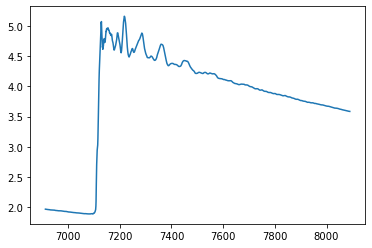

In [50]:


gain_keys = {'ch1_gain' : ['ch1_amp_gain', ]} # these will be different across the years :-)

from xas.file_io import load_binned_df_from_file


# take df_uid table, start documents (metadata), files with data and store and send them yourself, develop functionality, reimplement
INDEX = 12

df, _ = load_binned_df_from_file(df_uid.loc[INDEX]['filename'])

uid = df_uid.loc[INDEX]['uid']
start = db[uid].start

i0_in_mV = df['i0'] * 10**start['ch1_amp_gain'] * 1000
it_in_mV = df['it'] * 10**start['ch2_amp_gain'] * 1000
ir_in_mV = df['ir'] * 10**start['ch3_amp_gain'] * 1000
iff_in_mV = df['iff'] * 10**start['ch4_amp_gain'] * 1000
# current_in_mV > -3200 # saturated - need to check i0, it, iff
# np.all(current_in_mV > 0) # no useful signal - need to check i0 only

plt.figure();
plt.plot(df['energy'], -np.log(df['ir'] / df['it']))
# plt.plot(df['energy'], i0_in_mV)
# plt.plot(df['energy'], it_in_mV)
# plt.plot(df['energy'], ir_in_mV)
# plt.plot(df['energy'], iff_in_mV)

# mut = -np.log(it / i0)
# mur = -np.log(ir / it)
# muf = iff / i0

# read each file
# check for saturation and if signal has non-zero amplitude

# prepare files for averging - interpolate on the same energy grid
# average + outlier rejection (wikipedia: trimmed average + std)
# for each scan group we will need to find a good reference scan
# output for a scan_group should be list of metadata of all files, sample name, and (energy, mut, muf, mur)








In [60]:
from xas.file_io import load_binned_df_from_file


# take df_uid table, start documents (metadata), files with data and store and send them yourself, develop functionality, reimplement
INDEX = 12

df, _ = load_binned_df_from_file(df_uid.loc[INDEX]['filename'])

uid = df_uid.loc[INDEX]['uid']
start = db[uid].start


/nsls2/data/iss/legacy/processed/2022/3/300002/Sample 2 EI 1-100 Fe-K 0001.dat


In [66]:
test_data = {}
test_metadata = {}
for _, row in df_uid.iterrows():
    data_df = load_binned_df_from_file(row['filename'])
    uid = row['uid']
    start = db[uid].start
    
    test_data[uid] = data_df
    test_metadata[uid] = start

print(len(test_data), len(test_metadata))    

979 979


In [75]:
# df_uid.to_json('test_df_uid.json')
# pd.DataFrame(test_data).to_json('test_data.json')
# pd.DataFrame(test_metadata).to_json('test_metadata.json')

In [76]:
df_uid

,element,edge,uid,year,cycle,PROPOSAL,time,name,filename,scan_group,reduced_name
12,Fe,K,193027f8-8f88-437b-9ac5-ecca00369fde,2022,3,300002,1.663623e+09,Sample 2 EI 1-100 Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/3/300002...,0,Sample 2 EI 1-100 Fe-K
13,Fe,K,c978fc70-ab26-4848-84ef-d07b3d9023a7,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0005,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
14,Fe,K,238c62e6-3156-4bc7-8103-3d7256fe903c,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0004,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
15,Fe,K,25ca4e7a-6ea9-48c2-ac97-15f207b8a29a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0003,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
16,Fe,K,3bfefdba-0e87-4ba6-8108-a0591444808a,2022,3,310728,1.663292e+09,CuFe--oxVCF-FeK (pos 004) Fe-K 0002,/nsls2/data/iss/legacy/processed/2022/3/310728...,1,CuFe--oxVCF-FeK
...,...,...,...,...,...,...,...,...,...,...,...
995,Fe,K,daf46544-e040-4d40-9676-439b9a3f5239,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 008) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
996,Fe,K,ce8439fa-828c-4132-a30b-c89f933f7414,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 007) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
997,Fe,K,3b572c76-9634-4588-ac00-4a98f269a4ff,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 006) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
998,Fe,K,1dab5a84-bc9f-4c68-9f88-667da6aa903a,2022,2,310175,1.658202e+09,Sample_A1_Nanodisks (pos 005) Fe-K 0001,/nsls2/data/iss/legacy/processed/2022/2/310175...,140,Sample_A1_Nanodisks
